In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("MarketData.csv", encoding = "utf-8")
df.head()

,Month,GDP,BankRate,CPI,FederalRate,IPI,UnEmpRate,Oil,Commodity,TradeBal,Housing,BuildingPermit,SP500,DowJones,year,mon
0,2005-01,12761.34,5.25,191.6,2.28,98.79,5.3,83.76,150.9,-55561.0,4.4,2139.0,1181.41,10539.51,2005,1
1,2005-02,12761.34,5.49,192.4,2.50,99.45,5.4,84.61,151.6,-57454.0,4.3,2114.0,1199.63,10723.82,2005,2
2,2005-03,12761.34,5.58,193.1,2.63,99.32,5.2,86.14,153.7,-52619.0,4.1,2062.0,1194.90,10682.09,2005,3
3,2005-04,12910.02,5.75,193.7,2.79,99.46,5.2,85.55,155.0,-57115.0,4.3,2150.0,1164.43,10283.19,2005,4
4,2005-05,12910.02,5.98,193.6,3.00,99.60,5.1,84.69,154.3,-56264.0,4.2,2085.0,1178.28,10377.18,2005,5


In [40]:
print(df["CPI"].min())
print(df["CPI"].max())
df.count()

191.6
251.99


Month             165
GDP               165
BankRate          165
CPI               165
FederalRate       165
IPI               165
UnEmpRate         165
Oil               165
Commodity         165
TradeBal          165
Housing           165
BuildingPermit    165
SP500             165
DowJones          165
year              165
mon               165
dtype: int64

,Average Unemployment By Month
mon,
1,6.328571
2,6.328571
3,6.300000
4,6.292857
5,6.292857
6,6.292857
7,6.285714
8,6.285714
9,6.242857


In [2]:
yearly = df.groupby(by = "year")
yearly_unemp = yearly["UnEmpRate"].mean()
yearly_unemp_df = pd.DataFrame({"Average Unemployment By Year": yearly_unemp})
yearly_unemp_df.reset_index(inplace=True)

NameError: name 'df' is not defined

In [3]:
yearly_unemp_df.plot(x ='year', y = 'Average Unemployment By Year', kind = 'line', legend = False)
plt.ylabel('Unemployment Rate')
plt.title("Average Unemployment By Year")
plt.show()

NameError: name 'yearly_unemp_df' is not defined

In [74]:
seasonal = df.groupby(by = "mon")
mon_unemp = seasonal["UnEmpRate"].mean()
monthly_unemp_df = pd.DataFrame({"Average Unemployment By Month": mon_unemp})
monthly_unemp_df.reset_index(inplace=True)

In [75]:
monthly_unemp_df

,mon,Average Unemployment By Month
0,1,6.328571
1,2,6.328571
2,3,6.300000
3,4,6.292857
4,5,6.292857
5,6,6.292857
6,7,6.285714
7,8,6.285714
8,9,6.242857
9,10,6.423077


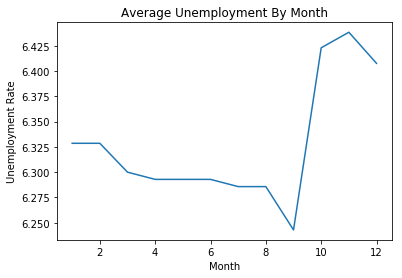

In [79]:
monthly_unemp_df.plot(x = 'mon', y = 'Average Unemployment By Month', kind = 'line', legend = False)
plt.ylabel('Unemployment Rate')
plt.xlabel('Month')
plt.title("Average Unemployment By Month")
plt.show()

In [83]:
yearly = df.groupby(by = "year")
yearly_oil = yearly["Oil"].mean()
yearly_oil_df = pd.DataFrame({"Average Oil Production By Year": yearly_oil})
yearly_oil_df.reset_index(inplace=True)

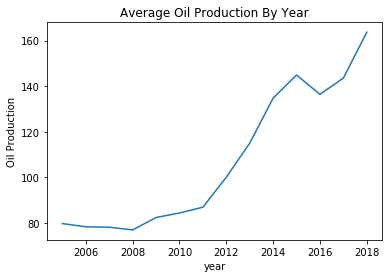

In [86]:
yearly_oil_df.plot(x = 'year', y = 'Average Oil Production By Year', kind = 'line', legend = False)
plt.ylabel('Oil Production')
plt.title("Average Oil Production By Year")
plt.show()

In [89]:
seasonal = df.groupby(by = "mon")
monthly_oil = seasonal["Oil"].mean()
monthly_oil_df = pd.DataFrame({"Average Oil Production By Month": monthly_oil})
monthly_oil_df.reset_index(inplace=True)

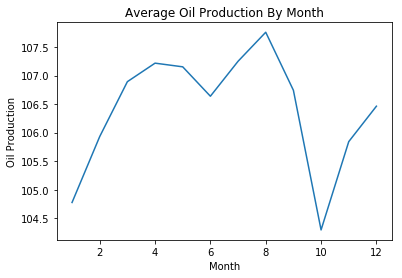

In [90]:
monthly_oil_df.plot(x = 'mon', y = 'Average Oil Production By Month', kind = 'line', legend = False)
plt.ylabel('Oil Production')
plt.xlabel('Month')
plt.title("Average Oil Production By Month")
plt.show()

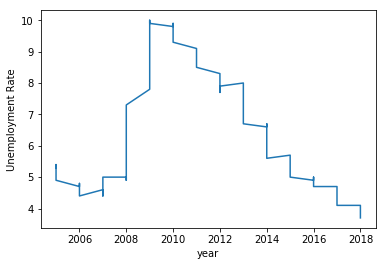

In [37]:
df.plot(x = 'year', y = 'Oil', kind = 'line', legend = False)
plt.ylabel('Oil Production')
plt.show()

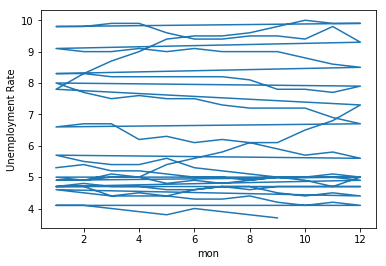

In [39]:
df.plot(x = 'mon', y = 'UnEmpRate', kind = 'line', legend = False)
plt.ylabel('Unemployment Rate')
plt.show()

In [16]:
#Split data into X and y
from sklearn.model_selection import train_test_split
#X = df.drop("DowJones", axis = 1)
X = df.drop("Month", axis = 1)
X = X.drop("CPI", axis = 1)
#X = X.drop("SP500", axis = 1)
y = df["CPI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [17]:
#Build model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit model to data 
model.fit(X_train, y_train)

#Evaluate model using R2 Score 
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.9969667509577756


In [18]:
#Evaluate model using Mean-Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(pd.DataFrame(model.predict(X_test)), y_test.reset_index(drop=True))

0.8472503785514067

In [53]:
pd.DataFrame(model.predict(X_test))

,0
0,18924.065903
1,17096.521624
2,18281.741293
3,8617.094687
4,13790.043782
5,13525.304232
6,22765.764725
7,8526.352546
8,14318.372380
9,19989.145439


In [50]:
y_test.reset_index(drop=True)


0     17844.37
1     16775.15
2     17542.85
3      9375.06
4     13144.17
5     13480.21
6     24582.17
7      7992.12
8     15035.75
9     20424.14
10    11257.35
11    12889.05
12    11234.68
13    10222.24
14    12512.89
15    13677.89
16    16305.25
17    15289.29
18    23036.24
19    11333.88
20    12434.88
21    11032.53
22    10872.48
23    10324.31
24    13239.71
25    25804.02
26    14418.26
27     9634.97
28    17302.14
29    24790.11
30    18495.19
31    12512.33
32    10471.24
Name: DowJones, dtype: float64

In [27]:
model.coef_ 

array([ 6.45955159e-03,  2.16080103e+00, -2.24763558e+00, -2.82120638e-01,
       -3.02233911e-01, -1.11706216e-02,  2.67768044e-01,  3.93154858e-05,
       -2.65589212e-01, -1.70502543e-03,  8.91419536e-04, -3.07996603e-04])

In [34]:
model.coef_ * X[:, 0]

TypeError: unhashable type: 'slice'

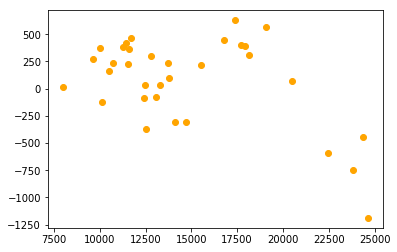

In [35]:
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

Text(0.5,1,'Residual Plot')

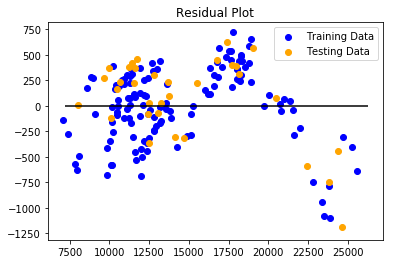

In [36]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

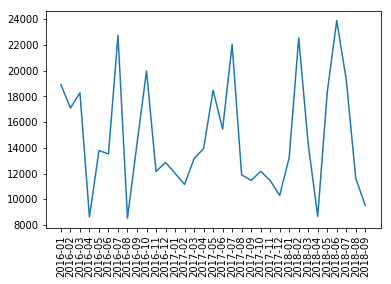

In [64]:
df_subset = df.loc[132:165]
plt.plot(df_subset["Month"], model.predict(X_test))

x_axis = np.arange(0, len(df_subset["Month"]))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, df_subset["Month"], rotation = 90)
plt.xticks()

plt.savefig("Plot.png")
plt.show()